In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/datasets/without_bg

Mounted at /content/drive


In [ ]:
import os

test_img_path = os.popen('ls /content/drive/MyDrive/datasets/without_bg | shuf -n 1').read().replace('\n', '')
test_img_path = '/content/drive/MyDrive/datasets/without_bg/' + test_img_path 

In [ ]:
from PIL import Image
from collections import Counter

image = Image.open(test_img_path)

image.thumbnail((100, 100))

pixels = image.getdata()

colors = Counter(pixels)

N = 6

most_common_colors = []

for color in colors.most_common(N):
    most_common_colors.append(color[0])

width = 500
height = 250

output_image = Image.new("RGB", [width, height])

blocks = width // N

for y in range(height):
    for x in range(width):
        common_color_index = x * N // width
        color = most_common_colors[common_color_index]
        output_image.putpixel((x,y), color)

remaining = width % N
color = most_common_colors[-1]
for y in range(height):
    for x in range(width - remaining, width):
        output_image.putpixel((x,y), color)

output_image.save("out.png")

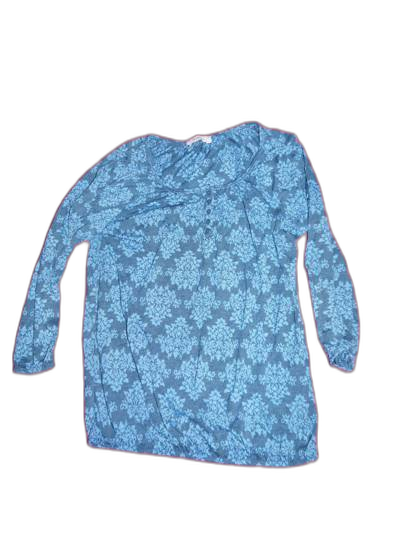

In [ ]:
from IPython.display import Image

Image(filename=test_img_path)

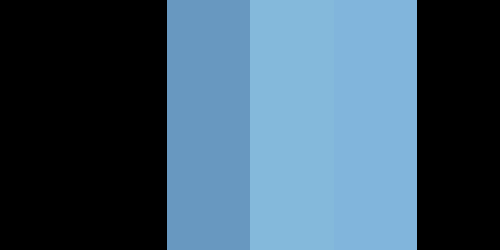

In [ ]:
Image(filename="out.png") 